#### Tweet Analysis

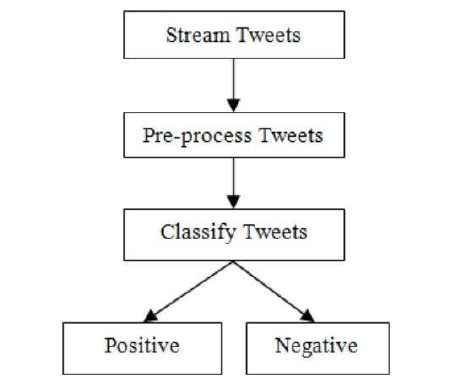

In [1]:
# Loading necessary modules
import pandas as pd              # data processing; csv file i/o (pd.read_csv)
import numpy as np               # linear algebra
%matplotlib inline

In [3]:
# Loading the dataset
df = pd.read_csv('./Dataset/Twitter_Suicide_Data_new.csv')
df_without_preprocess = pd.read_csv('./Dataset/Twitter_Suicide_Data_new.csv')  # 存档

In [4]:
# Dimensions of dataset
df.shape

(303, 3)

In [5]:
# A Look at the Dataset : First 5 rows ; Last 5 rows
df.head()

Id                             Content Sentiment
0  49640624.0                            The end.  Negative
1  43505275.0                GOD OVER EVERYTHING.  Negative
2  43505275.0                          I'm sorry.  Negative
3  43505275.0           God... please forgive me.  Negative
4  43505275.0  This day couldn't get any worse...  Negative

In [6]:
df.tail()

Id                                          Content Sentiment
298  9.334512e+17                      endless pain in life,end it  Negative
299  9.368911e+17                            lets ave a lot of fun  Positive
300  9.123422e+17  Nothing left in this world for me,i want to die  Negative
301  9.368912e+17                          I am successful in life  Positive
302  9.368912e+17                                      End my life  Negative

In [8]:
# Data types
df.dtypes

Id           float64
Content       object
Sentiment     object
dtype: object

In [9]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         303 non-null    float64
 1   Content    303 non-null    object 
 2   Sentiment  303 non-null    object 
dtypes: float64(1), object(2)
memory usage: 7.2+ KB


In [10]:
df.isnull().sum()        # no. of missing values in each column ; no missing value found

Id           0
Content      0
Sentiment    0
dtype: int64

## Visualization

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [16]:
from PIL import Image

In [21]:
import seaborn as sns

In [17]:
#DEFINING A FUNCTION TO VISUALISE MOST USED WORDS
def plot_most_used_words(category_string, data_series, palette, image_mask):
    #CHECKING OUT COMMON WORDS IN r/SuicideWatch USING CVEC
    cvec = CountVectorizer(stop_words='english')
    cvec.fit(data_series)
    #CREATING A DATAFRAME OF EXTRACTED WORDS
    created_df = pd.DataFrame(cvec.transform(data_series).todense(),
                              columns=cvec.get_feature_names())
    total_words = created_df.sum(axis=0)
    
    #<<<WORDCLOUD>>>
    #CREATING A LONG STRING OF WORDS FOR THE WORD CLOUD MODULE
    top_40_words = total_words.sort_values(ascending = False).head(40)
    top_40_words_df = pd.DataFrame(top_40_words)
    top_words_cloud_df = top_40_words_df.reset_index()
    top_words_cloud_df.columns = ["words", "count"]
    one_string_list = []
    for i in range(len(top_words_cloud_df)):
        one_string = (top_words_cloud_df["words"][i] + " ")* top_words_cloud_df["count"][i]
        one_string_list.append(one_string)
    long_string = " ".join(string for string in one_string_list)
    #print(long_string)
    # CREATING A WORD CLOUD IMAGE
    mask = np.array(Image.open(image_mask))
    wordcloud = WordCloud(repeat=True, collocations=False,min_font_size=2, max_font_size= 80, max_words= 1000, background_color= "white",colormap= palette,  mask= mask).generate(long_string)
    # DISPLAY IT
    #image_colors = ImageColorGenerator(mask)
    #plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
    #plt.axis("off")
    plt.figure(figsize = (20, 5), dpi=300)
    plt.title('\nTop Words used in {}\n'.format(category_string), fontsize=22)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    
    #<<<BARPLOT>>>
    #CREATING A FINAL DATAFRAME OF THE TOP 20 WORDS
    top_20_words = total_words.sort_values(ascending = False).head(20)
    top_20_words_df = pd.DataFrame(top_20_words, columns = ["count"])
    #PLOTTING THE COUNT OF THE TOP 20 WORDS
    sns.set_style("white")
    plt.figure(figsize = (15, 8), dpi=300)
    ax = sns.barplot(y= top_20_words_df.index, x="count", data=top_20_words_df, palette = palette)
    
    plt.xlabel("Count", fontsize=9)
    plt.ylabel('Common Words in {}'.format(category_string), fontsize=9)
    plt.yticks(rotation=-5)

In [19]:
negative_posts = df[df["Sentiment"] == 'Negative']["Content"]
positive_posts = df[df["Sentiment"] == 'Positive']["Content"]

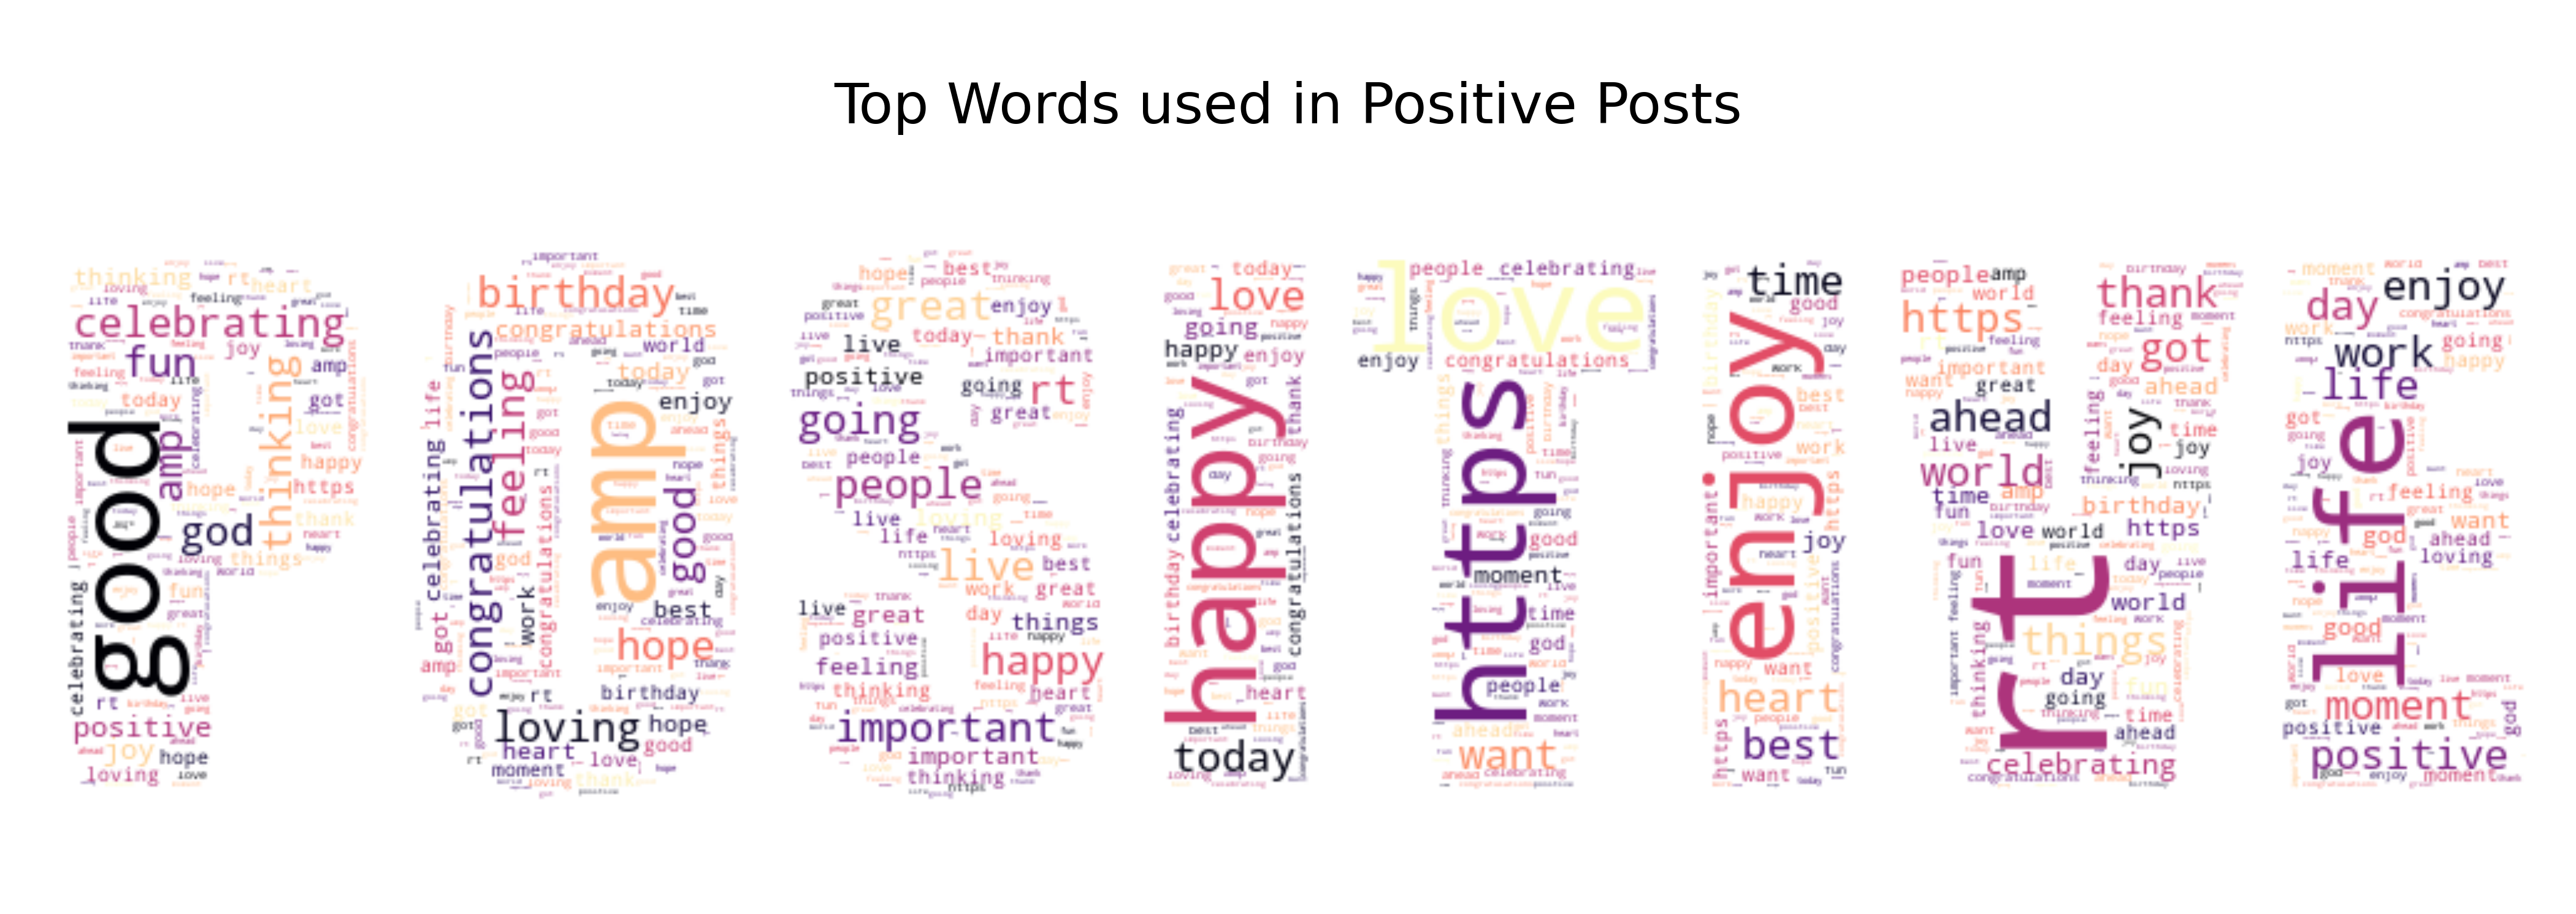

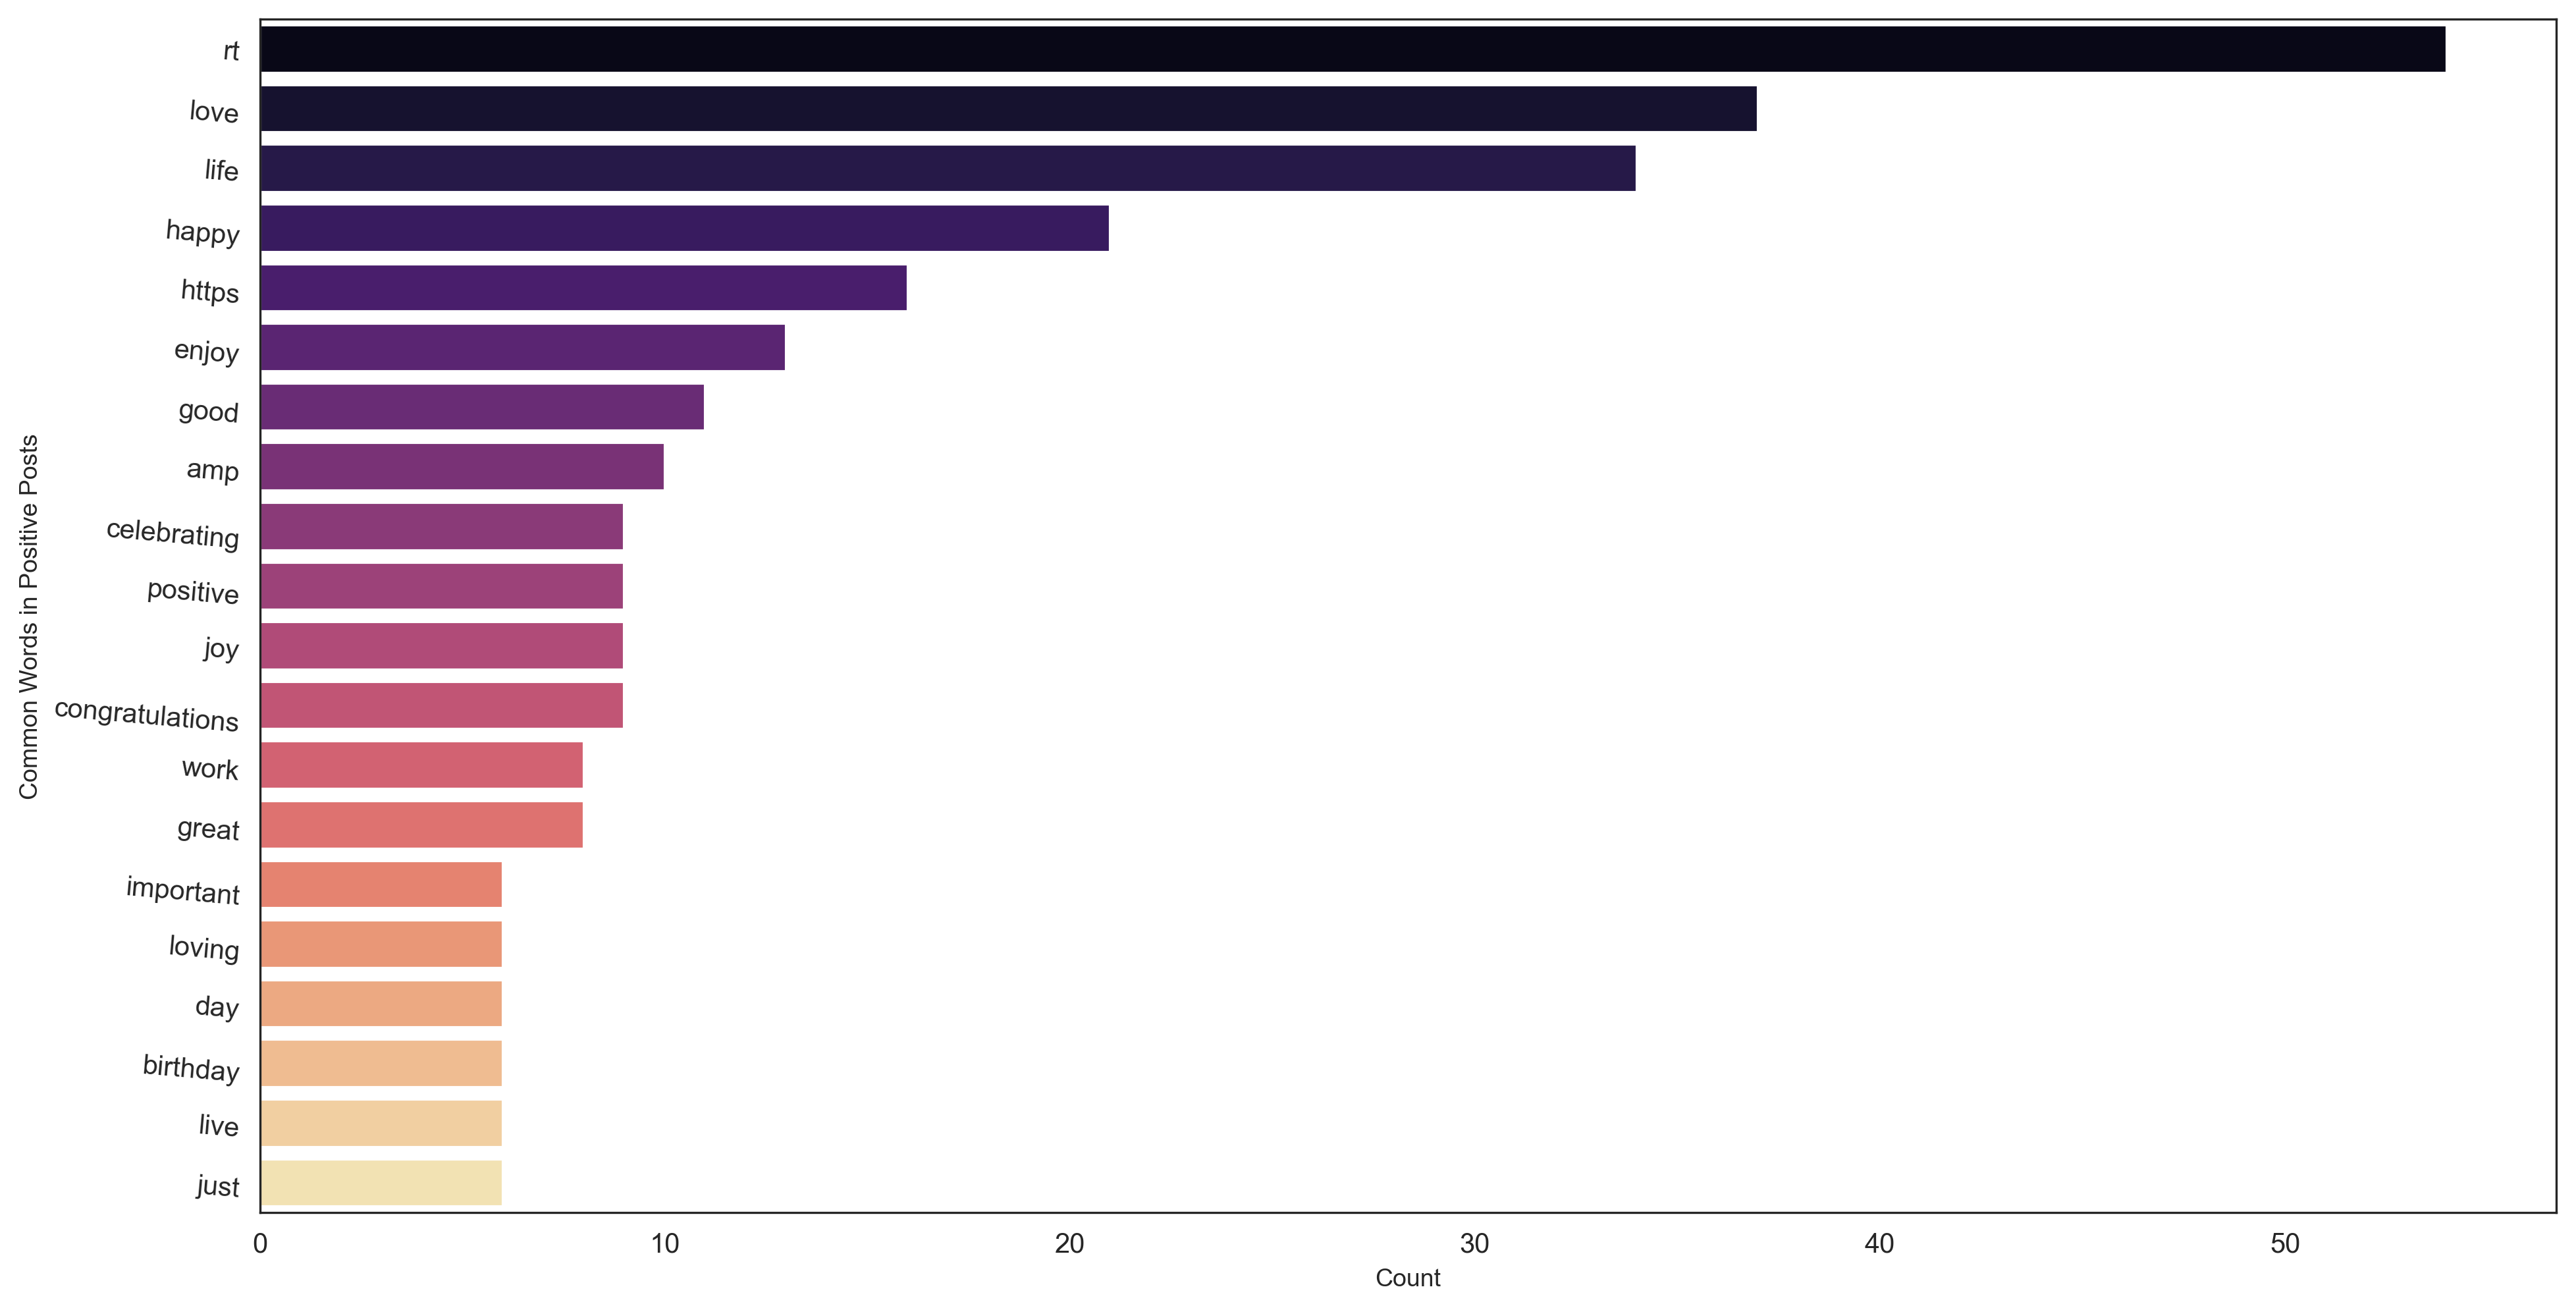

In [22]:
plot_most_used_words("Positive Posts", positive_posts, palette="magma", image_mask="../assets/positive_mask.png")

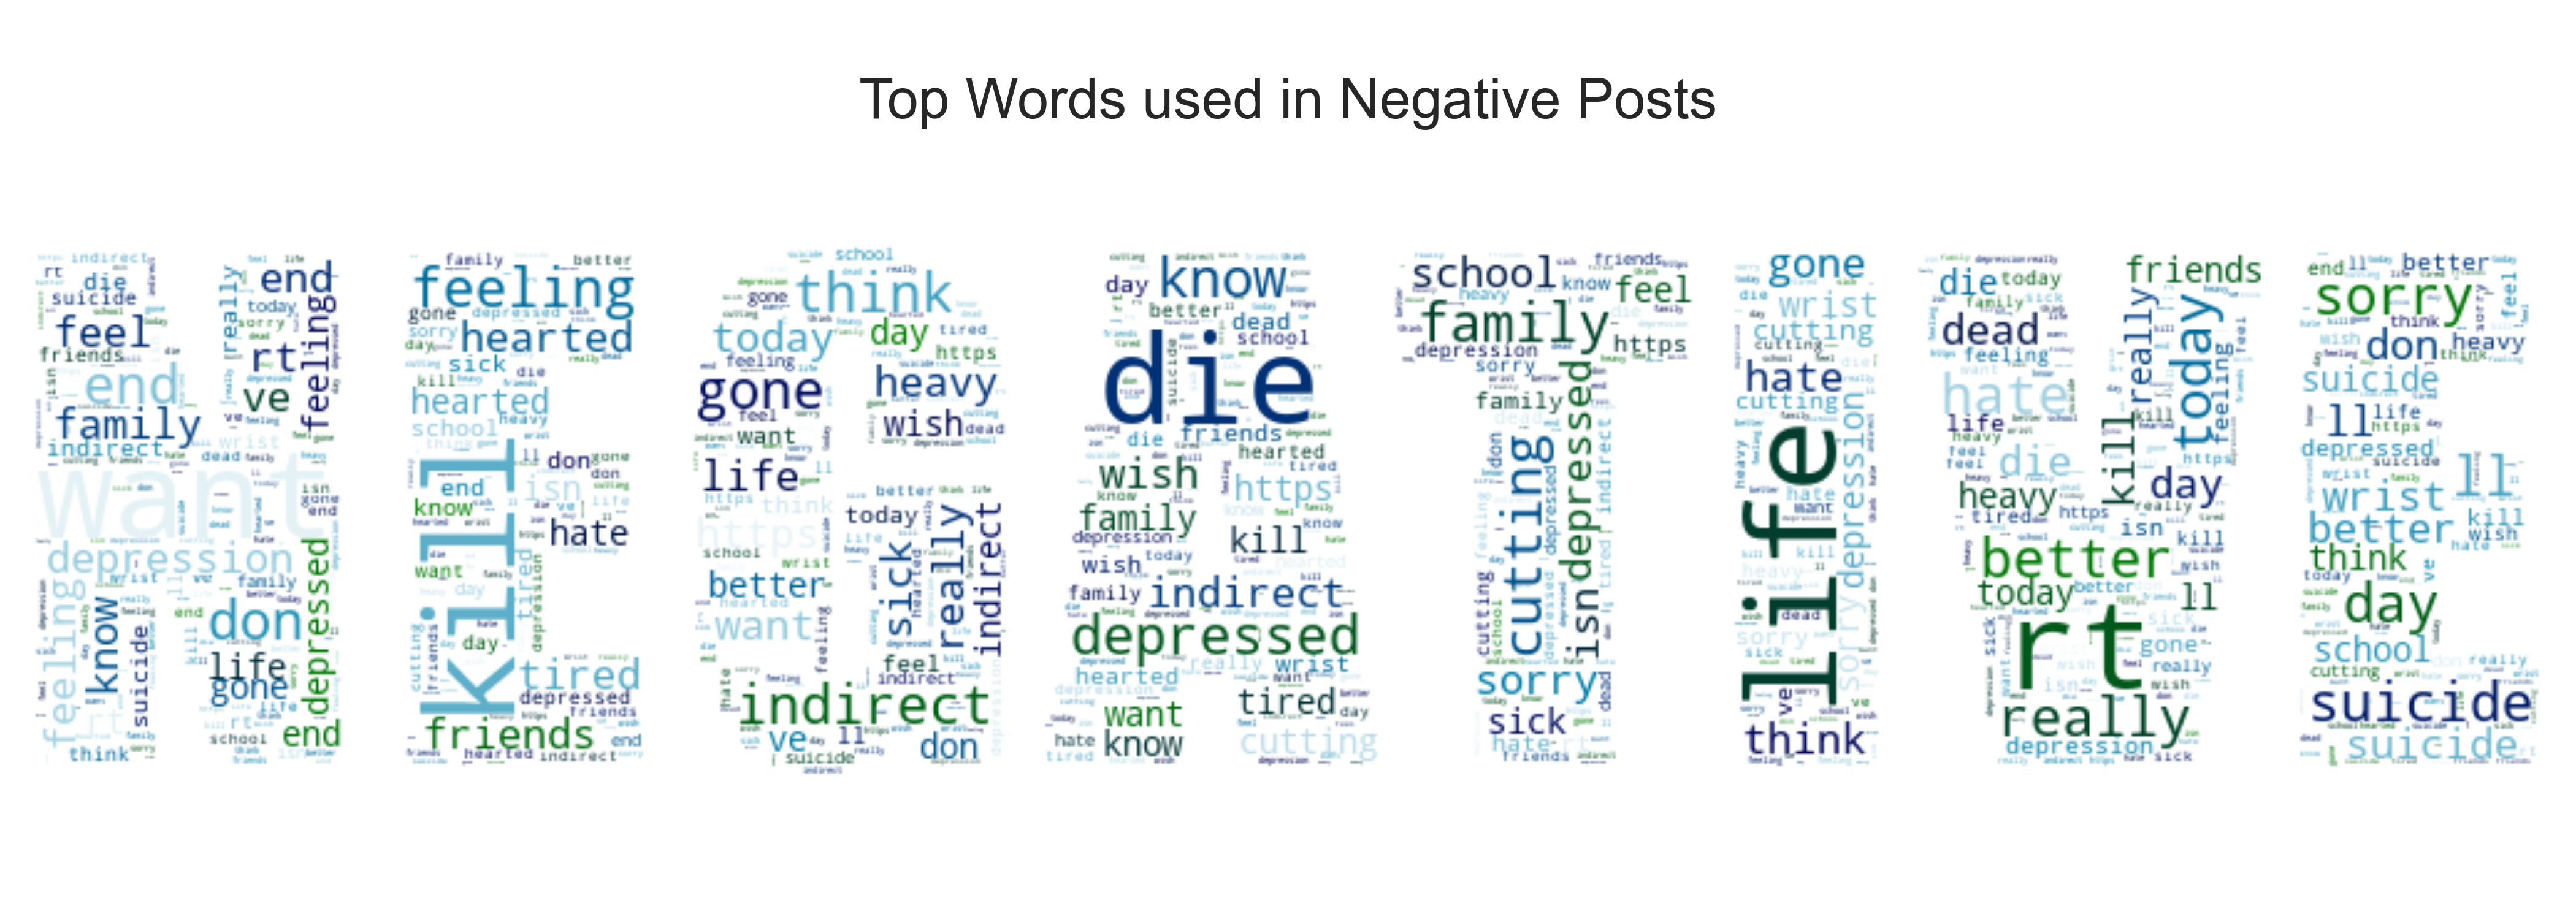

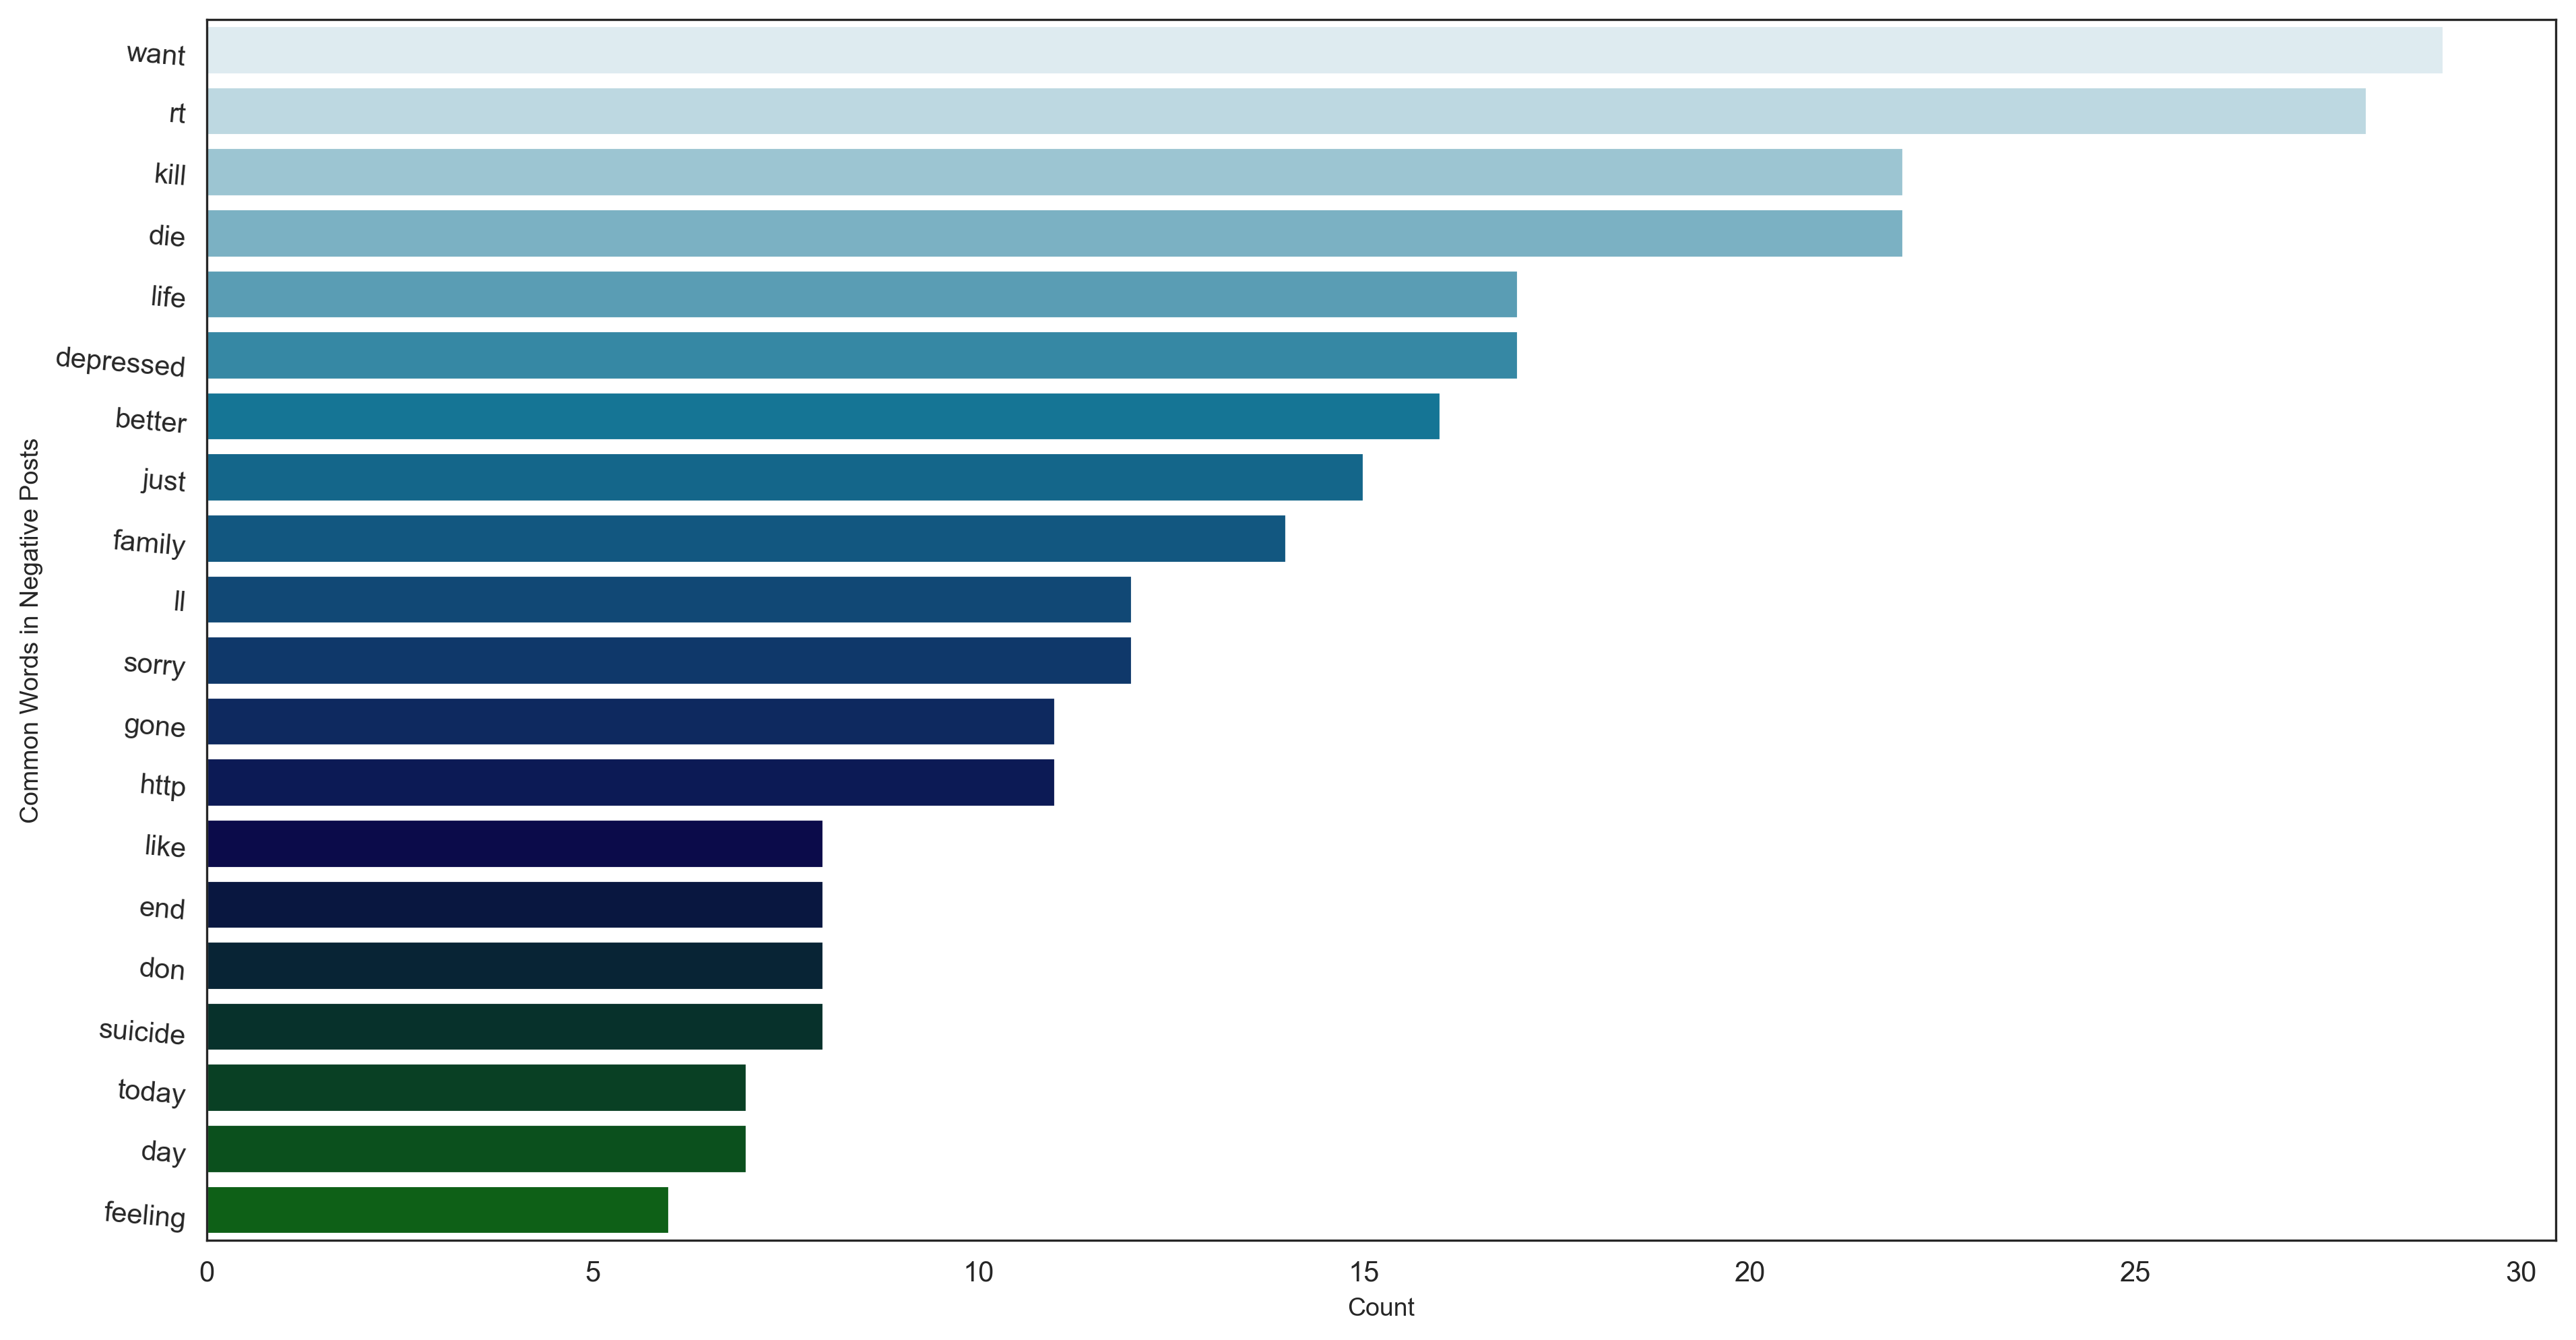

In [23]:
plot_most_used_words("Negative Posts", negative_posts, palette="ocean_r", image_mask="../assets/negative_mask.png")

## Preprocess Tweets

### Before we start building the analyzer, we first need to remove noise and preprocess tweets by using the following steps:

* Lower Case - Convert the tweets to lower case.
* URLs - Eliminate all of these URLs via regular expression matching or replace with generic word URL.
* @username - Remove "@username" via regex matching or replace it with generic word AT_USER.
* #hashtag - replace hashtags with the exact same word without the hash (hash tags may provide some useful information), e.g. #boycottUnitedAirlines replaced with ' boycottUnitedAirlines '.
* Punctuations and additional white spaces - remove punctuation at the start and ending of the tweets, e.g: ' the day is beautiful! ' replaced with 'the day is beautiful'. We also replace multiple whitespaces with a single whitespace.

In [29]:
len(df[df["Sentiment"] == 'Negative'])

175

In [30]:
len(df[df["Sentiment"] == 'Positive'])

128

### After Enlarge

In [36]:
df = pd.read_csv('./Dataset/Twitter_Suicide_Data_new_enlarged.csv')

UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 37-38: invalid continuation byte

In [37]:
df

Id                                          Content Sentiment
0    4.964062e+07                                         The end.  Negative
1    4.350528e+07                             god over everything   Negative
2    4.350528e+07                                       i m sorry   Negative
3    4.350528e+07                        god    please forgive me   Negative
4    4.350528e+07               this day couldn t get any worse     Negative
..            ...                                              ...       ...
298  9.334512e+17                      endless pain in life end it  Negative
299  9.368911e+17                            lets ave a lot of fun  Positive
300  9.123422e+17  nothing left in this world for me i want to die  Negative
301  9.368912e+17                          i am successful in life  Positive
302  9.368912e+17                                      end my life  Negative

[303 rows x 3 columns]

In [38]:
###Preprocess tweets
def processTweet2(tweet):
    # process the tweets

    #Convert to lower case
    tweet = tweet.lower()
    tweet.lower()
    #convert any url to URL
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','URL',tweet)
    #Convert any @Username to "AT_USER"
    tweet = re.sub('@[^\s]+','AT_USER',tweet)
    #Remove additional white spaces
    tweet = re.sub('[\s]+', ' ', tweet)
    tweet = re.sub('[\n]+', ' ', tweet)
    #Remove not alphanumeric symbols white spaces
    tweet = re.sub(r'[^\w]', ' ', tweet)
    #Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
    #Remove :( or :)
    tweet = tweet.replace(':)','')
    tweet = tweet.replace(':(','')
    #trim
    tweet = tweet.strip('\'"')
    re.sub('[^A-Za-z0-9]+', '', tweet)
    replaceTwoOrMore(tweet)
    return tweet    

###get stopword list
def getStopWordList(stopWordListFileName):
    #read the stopwords file and build a list
    stopWords = []
    stopWords.append('at_user')
    stopWords.append('url')

    fp = open(stopWordListFileName, 'r')
    line = fp.readline()
    while line:
        word = line.strip()
        stopWords.append(word)
        line = fp.readline()
    fp.close()
    return stopWords



def replaceTwoOrMore(s):
    #look for 2 or more repetitions of character and replace with the character itself
    pattern = re.compile(r"(.)\1{1,}", re.DOTALL)
    return pattern.sub(r"\1\1", s)
#end

In [39]:
stopWords = []

st = open('stopwords.txt', 'r')
stopWords = getStopWordList('stopwords.txt')
stopWords

['at_user',
 'url',
 'a',
 'at_user',
 'rt',
 'am',
 'about',
 'above',
 'across',
 'after',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'among',
 'an',
 'and',
 'another',
 'any',
 'anybody',
 'anyone',
 'anything',
 'anywhere',
 'are',
 'area',
 'areas',
 'around',
 'as',
 'ask',
 'asked',
 'asking',
 'asks',
 'at',
 'away',
 'b',
 'back',
 'backed',
 'backing',
 'backs',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'been',
 'before',
 'began',
 'behind',
 'being',
 'beings',
 'best',
 'better',
 'between',
 'big',
 'both',
 'but',
 'by',
 'c',
 'came',
 'can',
 'cannot',
 'case',
 'cases',
 'certain',
 'certainly',
 'clear',
 'clearly',
 'come',
 'could',
 'd',
 'did',
 'differ',
 'different',
 'differently',
 'do',
 'does',
 'done',
 'down',
 'downed',
 'downing',
 'downs',
 'during',
 'e',
 'each',
 'early',
 'either',
 'enough',
 'even',
 'evenly',
 'ever',
 'every',
 'everybody',
 'everyone',
 'everything',


In [40]:
import re
import csv

In [41]:
for i in range(1,303):
    tweet=df.iloc[i,1]
    df.iloc[i,1]=processTweet2(tweet)

In [42]:
df.head()

Id                           Content Sentiment
0  49640624.0                          The end.  Negative
1  43505275.0              god over everything   Negative
2  43505275.0                        i m sorry   Negative
3  43505275.0            god please forgive me   Negative
4  43505275.0  this day couldn t get any worse   Negative

In [43]:
def getFeatureVector(tweet):
    features = []

    words = tweet.split()
    for w in words:

        w = replaceTwoOrMore(w)

        #strip digits
        w = w.strip('0123456789')

        #strip punctuation
        w = w.strip('\'"!?,.')

        if (w == ""):
            continue
        elif(w in stopWords):
            #print w
            continue
        else:
            features.append(w.lower())

    return features
#end

In [44]:
for i in range(0,303):
    tweet=df.iloc[i,1]
    a=getFeatureVector(tweet)
    df.iloc[i,1] = " ".join(a)
    print(a)
    

['the', 'end']
['god']
['sorry']
['god', 'please', 'forgive']
['day', 'couldn', 'worse']
['delete', 'twitter']
['depression', 'die']
['fucking', 'die', 'sometimes']
['die']
['people', 'twitter', 'tweets', 'saying', 'die', 'repeatedly']
['struggling', 'depression', 'mom', 'died', 'stage', 'brain', 'cancer', 'hard']
['family', 'probably']
['family']
['im', 'starting', 'family', 'ultimately', 'fuckup', 'moreharmthangood']
['jaggoff', 'performs', 'exorcisms', 'skype', 'power', 'christ', 'compels']
['write', 'lesson', 'plan', 'gonna', 'kill']
['wow', 'jaggoff', 'drink', 'budlight', 'grip', 'leave', 'parents', 'talk', 'yo', 'mama']
['judging', 'jumping', 'prone', 'techniques', 'looks', 'ied', 'height', 'jump', 'prone', 'die']
['family']
['indirect', 'tweets', 'cowardly', 'tweet', 'direct', 'indirect', 'indirectly', 'courageously']
['indirect', 'tweets', 'cowardly', 'tweet', 'direct', 'indirect', 'indirectly', 'courageously']
['sometimes', 'ifeel', 'family']
['indirect', 'school', 'depression

['die']
['plz', 'kill']
['love', 'yourself', 'love', 'peace']
['sick', 'feeling']
['happier', 'promise']
['guys', 'anyways']
['guys', 'honestly']
['congratulations', 'king']
['stress', 'kill']
['people', 'kill']
['embarrassing', 'wish', 'dead']
['name', 'edd', 'wish', 'dead']
['respect', 'respect']
['doing', 'suicide']
['love', 'friends']
['kill']
['loving', 'dance', 'passion']
['endless', 'pain', 'life', 'end']
['ave', 'lot', 'fun']
['left', 'world', 'die']
['successful', 'life']
['end', 'life']


In [45]:
df.head()

Id             Content Sentiment
0  49640624.0             the end  Negative
1  43505275.0                 god  Negative
2  43505275.0               sorry  Negative
3  43505275.0  god please forgive  Negative
4  43505275.0    day couldn worse  Negative

In [46]:
stopWords

['at_user',
 'url',
 'a',
 'at_user',
 'rt',
 'am',
 'about',
 'above',
 'across',
 'after',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'among',
 'an',
 'and',
 'another',
 'any',
 'anybody',
 'anyone',
 'anything',
 'anywhere',
 'are',
 'area',
 'areas',
 'around',
 'as',
 'ask',
 'asked',
 'asking',
 'asks',
 'at',
 'away',
 'b',
 'back',
 'backed',
 'backing',
 'backs',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'been',
 'before',
 'began',
 'behind',
 'being',
 'beings',
 'best',
 'better',
 'between',
 'big',
 'both',
 'but',
 'by',
 'c',
 'came',
 'can',
 'cannot',
 'case',
 'cases',
 'certain',
 'certainly',
 'clear',
 'clearly',
 'come',
 'could',
 'd',
 'did',
 'differ',
 'different',
 'differently',
 'do',
 'does',
 'done',
 'down',
 'downed',
 'downing',
 'downs',
 'during',
 'e',
 'each',
 'early',
 'either',
 'enough',
 'even',
 'evenly',
 'ever',
 'every',
 'everybody',
 'everyone',
 'everything',


In [47]:
tweets = []
featureList = []
for i in range(0,303):
    sentiment = df['Sentiment'][i]
    tweet = df['Content'][i]
    processedTweet = processTweet2(tweet)
    featureVector = getFeatureVector(processedTweet)
    featureList.extend(featureVector)
    tweets.append((featureVector, sentiment))


In [48]:
def extract_features1(tweet):
    processedTweet = processTweet2(tweet)
    featureVector = getFeatureVector(processedTweet)
    print(featureVector)
    features = {}
    for word in featureList:
        features['contains(%s)' % word] = (word in featureVector)
    return features

In [49]:
def extract_features(tweet):
    tweet_words = set(tweet)
    print(tweet_words)
    features = {}
    for word in featureList:
        features['contains(%s)' % word] = (word in tweet_words)
    return features

In [50]:
featureList

['end',
 'god',
 'sorry',
 'god',
 'please',
 'forgive',
 'day',
 'couldn',
 'worse',
 'delete',
 'twitter',
 'depression',
 'die',
 'fucking',
 'die',
 'sometimes',
 'die',
 'people',
 'twitter',
 'tweets',
 'saying',
 'die',
 'repeatedly',
 'struggling',
 'depression',
 'mom',
 'died',
 'stage',
 'brain',
 'cancer',
 'hard',
 'family',
 'probably',
 'family',
 'im',
 'starting',
 'family',
 'ultimately',
 'fuckup',
 'moreharmthangood',
 'jaggoff',
 'performs',
 'exorcisms',
 'skype',
 'power',
 'christ',
 'compels',
 'write',
 'lesson',
 'plan',
 'gonna',
 'kill',
 'wow',
 'jaggoff',
 'drink',
 'budlight',
 'grip',
 'leave',
 'parents',
 'talk',
 'yo',
 'mama',
 'judging',
 'jumping',
 'prone',
 'techniques',
 'looks',
 'ied',
 'height',
 'jump',
 'prone',
 'die',
 'family',
 'indirect',
 'tweets',
 'cowardly',
 'tweet',
 'direct',
 'indirect',
 'indirectly',
 'courageously',
 'indirect',
 'tweets',
 'cowardly',
 'tweet',
 'direct',
 'indirect',
 'indirectly',
 'courageously',
 'some

In [51]:
fe=extract_features1("love india")
fe

['love', 'india']


{'contains(end)': False,
 'contains(god)': False,
 'contains(sorry)': False,
 'contains(please)': False,
 'contains(forgive)': False,
 'contains(day)': False,
 'contains(couldn)': False,
 'contains(worse)': False,
 'contains(delete)': False,
 'contains(twitter)': False,
 'contains(depression)': False,
 'contains(die)': False,
 'contains(fucking)': False,
 'contains(sometimes)': False,
 'contains(people)': False,
 'contains(tweets)': False,
 'contains(saying)': False,
 'contains(repeatedly)': False,
 'contains(struggling)': False,
 'contains(mom)': False,
 'contains(died)': False,
 'contains(stage)': False,
 'contains(brain)': False,
 'contains(cancer)': False,
 'contains(hard)': False,
 'contains(family)': False,
 'contains(probably)': False,
 'contains(im)': False,
 'contains(starting)': False,
 'contains(ultimately)': False,
 'contains(fuckup)': False,
 'contains(moreharmthangood)': False,
 'contains(jaggoff)': False,
 'contains(performs)': False,
 'contains(exorcisms)': False,
 'con

In [52]:
import nltk
training_set = nltk.classify.util.apply_features(extract_features, tweets)
# Train the classifier Naive Bayes Classifier
NBClassifier = nltk.NaiveBayesClassifier.train(training_set)


{'end'}
{'god'}
{'sorry'}
{'god', 'please', 'forgive'}
{'day', 'worse', 'couldn'}
{'twitter', 'delete'}
{'depression', 'die'}
{'fucking', 'die', 'sometimes'}
{'die'}
{'tweets', 'saying', 'people', 'repeatedly', 'die', 'twitter'}
{'mom', 'depression', 'cancer', 'struggling', 'brain', 'hard', 'stage', 'died'}
{'probably', 'family'}
{'family'}
{'moreharmthangood', 'im', 'ultimately', 'fuckup', 'starting', 'family'}
{'power', 'compels', 'performs', 'christ', 'skype', 'exorcisms', 'jaggoff'}
{'gonna', 'lesson', 'kill', 'write', 'plan'}
{'talk', 'leave', 'parents', 'drink', 'yo', 'grip', 'wow', 'budlight', 'mama', 'jaggoff'}
{'judging', 'ied', 'jumping', 'techniques', 'jump', 'height', 'looks', 'die', 'prone'}
{'family'}
{'tweet', 'tweets', 'indirectly', 'direct', 'cowardly', 'courageously', 'indirect'}
{'tweet', 'tweets', 'indirectly', 'direct', 'cowardly', 'courageously', 'indirect'}
{'ifeel', 'sometimes', 'family'}
{'joke', 'school', 'suicide', 'depression', 'indirect'}
{'suicide', 'indir

In [53]:
training_set

{'end'}
{'god'}
{'sorry'}


[({'contains(end)': True, 'contains(god)': False, 'contains(sorry)': False, 'contains(please)': False, 'contains(forgive)': False, 'contains(day)': False, 'contains(couldn)': False, 'contains(worse)': False, 'contains(delete)': False, 'contains(twitter)': False, 'contains(depression)': False, 'contains(die)': False, 'contains(fucking)': False, 'contains(sometimes)': False, 'contains(people)': False, 'contains(tweets)': False, 'contains(saying)': False, 'contains(repeatedly)': False, 'contains(struggling)': False, 'contains(mom)': False, 'contains(died)': False, 'contains(stage)': False, 'contains(brain)': False, 'contains(cancer)': False, 'contains(hard)': False, 'contains(family)': False, 'contains(probably)': False, 'contains(im)': False, 'contains(starting)': False, 'contains(ultimately)': False, 'contains(fuckup)': False, 'contains(moreharmthangood)': False, 'contains(jaggoff)': False, 'contains(performs)': False, 'contains(exorcisms)': False, 'contains(skype)': False, 'contains(po

In [54]:

NBClassifier.show_most_informative_features()

Most Informative Features
           contains(die) = True           Negati : Positi =     10.5 : 1.0
          contains(kill) = True           Negati : Positi =     10.5 : 1.0
           contains(joy) = True           Positi : Negati =      8.6 : 1.0
          contains(good) = True           Positi : Negati =      6.3 : 1.0
          contains(live) = True           Positi : Negati =      5.9 : 1.0
      contains(thinking) = True           Positi : Negati =      5.0 : 1.0
       contains(suicide) = True           Negati : Positi =      4.2 : 1.0
         contains(ahead) = True           Positi : Negati =      4.1 : 1.0
         contains(heart) = True           Positi : Negati =      4.1 : 1.0
         contains(makes) = True           Positi : Negati =      3.2 : 1.0


In [55]:
NBClassifier.classify(extract_features1("I want to die"))

['die']


'Negative'

In [56]:
 sorted(NBClassifier.labels())

['Negative', 'Positive']

In [57]:
NBClassifier.prob_classify(extract_features("I love you"))

{'I', 'e', 'u', ' ', 'o', 'l', 'y', 'v'}


<ProbDist with 2 samples>

In [58]:
extract_features("love")

{'l', 'e', 'o', 'v'}


{'contains(end)': False,
 'contains(god)': False,
 'contains(sorry)': False,
 'contains(please)': False,
 'contains(forgive)': False,
 'contains(day)': False,
 'contains(couldn)': False,
 'contains(worse)': False,
 'contains(delete)': False,
 'contains(twitter)': False,
 'contains(depression)': False,
 'contains(die)': False,
 'contains(fucking)': False,
 'contains(sometimes)': False,
 'contains(people)': False,
 'contains(tweets)': False,
 'contains(saying)': False,
 'contains(repeatedly)': False,
 'contains(struggling)': False,
 'contains(mom)': False,
 'contains(died)': False,
 'contains(stage)': False,
 'contains(brain)': False,
 'contains(cancer)': False,
 'contains(hard)': False,
 'contains(family)': False,
 'contains(probably)': False,
 'contains(im)': False,
 'contains(starting)': False,
 'contains(ultimately)': False,
 'contains(fuckup)': False,
 'contains(moreharmthangood)': False,
 'contains(jaggoff)': False,
 'contains(performs)': False,
 'contains(exorcisms)': False,
 'con

In [59]:
test=[extract_features1("sorry"),extract_features1("i can do anythong")]
for pdist in NBClassifier.prob_classify_many(test):
    print('%.4f %.4f' % (pdist.prob('Positive'), pdist.prob('Negative')))

['sorry']
['anythong']
0.0024 0.9976
0.0444 0.9556


In [60]:
extract_features1("be yourself")

['yourself']


{'contains(end)': False,
 'contains(god)': False,
 'contains(sorry)': False,
 'contains(please)': False,
 'contains(forgive)': False,
 'contains(day)': False,
 'contains(couldn)': False,
 'contains(worse)': False,
 'contains(delete)': False,
 'contains(twitter)': False,
 'contains(depression)': False,
 'contains(die)': False,
 'contains(fucking)': False,
 'contains(sometimes)': False,
 'contains(people)': False,
 'contains(tweets)': False,
 'contains(saying)': False,
 'contains(repeatedly)': False,
 'contains(struggling)': False,
 'contains(mom)': False,
 'contains(died)': False,
 'contains(stage)': False,
 'contains(brain)': False,
 'contains(cancer)': False,
 'contains(hard)': False,
 'contains(family)': False,
 'contains(probably)': False,
 'contains(im)': False,
 'contains(starting)': False,
 'contains(ultimately)': False,
 'contains(fuckup)': False,
 'contains(moreharmthangood)': False,
 'contains(jaggoff)': False,
 'contains(performs)': False,
 'contains(exorcisms)': False,
 'con

In [61]:
NBClassifier.classify(extract_features1("i love"))

['love']


'Positive'

In [62]:
# examine the shape
df.shape

(303, 3)

In [63]:
# examine the class distribution
df.Sentiment.value_counts()

Negative    175
Positive    128
Name: Sentiment, dtype: int64

In [64]:
# convert label to a numerical variable
df['Sentiment_num'] = df.Sentiment.map({'Negative':0, 'Positive':1})

In [65]:
# check that the conversion worked
df.head(10)

Id                                      Content Sentiment  \
0  4.964062e+07                                      the end  Negative   
1  4.350528e+07                                          god  Negative   
2  4.350528e+07                                        sorry  Negative   
3  4.350528e+07                           god please forgive  Negative   
4  4.350528e+07                             day couldn worse  Negative   
5  4.350528e+07                               delete twitter  Negative   
6  9.194280e+17                               depression die  Negative   
7  9.194280e+17                        fucking die sometimes  Negative   
8  9.194280e+17                                          die  Negative   
9  9.194280e+17  people twitter tweets saying die repeatedly  Negative   

   Sentiment_num  
0              0  
1              0  
2              0  
3              0  
4              0  
5              0  
6              0  
7              0  
8              0  
9              0

In [66]:
# how to define X and y (from the Suicide data) for use with COUNTVECTORIZER
X = df.Content
y = df.Sentiment_num
print(X.shape)
print(y.shape)

(303,)
(303,)


In [68]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(227,)
(76,)
(227,)
(76,)


In [69]:
# import and instantiate CountVectorizer (with the default parameters)
from sklearn.feature_extraction.text import CountVectorizer

In [70]:
# instantiate the vectorizer
vect = CountVectorizer()

In [71]:
# learn training data vocabulary, then use it to create a document-term matrix
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)

In [72]:
# examine the document-term matrix
X_train_dtm

<227x610 sparse matrix of type '<class 'numpy.int64'>'
	with 1043 stored elements in Compressed Sparse Row format>

In [73]:
# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
X_test_dtm

<76x610 sparse matrix of type '<class 'numpy.int64'>'
	with 192 stored elements in Compressed Sparse Row format>

In [74]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [75]:
# train the model using X_train_dtm (timing it with an IPython "magic command")
%time nb.fit(X_train_dtm, y_train)

Wall time: 7.99 ms


MultinomialNB()

In [76]:
# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)

In [77]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.9473684210526315

In [78]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[39,  1],
       [ 3, 33]], dtype=int64)

In [79]:
X_test[(y_pred_class==1)&(y_test==0)] #print tweet for false positive

193    god loosing people life everyday move ahead life
Name: Content, dtype: object

In [80]:

# calculate predicted probabilities for X_test_dtm (poorly calibrated)
y_pred_prob = nb.predict_proba(X_test_dtm)[:, 1]
y_pred_prob

array([1.32543056e-02, 6.45446642e-01, 7.43431731e-02, 8.04042536e-01,
       5.77227345e-01, 8.88052434e-01, 2.85597889e-01, 9.64909249e-01,
       9.81564665e-01, 9.74638345e-01, 4.09892033e-02, 4.05286344e-01,
       7.43431731e-02, 4.60432406e-01, 9.99588346e-01, 4.69145409e-01,
       1.09664259e-01, 7.43431731e-02, 6.39043247e-02, 3.39014957e-01,
       3.30624030e-02, 2.93361497e-02, 9.30352697e-02, 9.98122565e-01,
       6.06925430e-01, 8.98583391e-01, 9.63774822e-01, 1.46003154e-01,
       6.39043247e-02, 9.99784037e-01, 4.50739477e-01, 6.39043247e-02,
       1.35020864e-03, 1.40710433e-02, 8.80632013e-01, 7.43431731e-02,
       9.74638345e-01, 8.46933113e-01, 7.32293361e-01, 4.79556926e-02,
       4.06125712e-01, 5.95201260e-01, 9.99985511e-01, 7.43431731e-02,
       7.43431731e-02, 7.84818652e-01, 7.44630466e-02, 4.60432406e-01,
       9.99947496e-01, 8.80632013e-01, 2.54473735e-01, 7.32293361e-01,
       8.72425881e-01, 2.54473735e-01, 1.02314867e-01, 4.76935670e-01,
      

In [81]:
# calculate AUC
metrics.roc_auc_score(y_test, y_pred_prob)

0.9618055555555556

In [82]:
# import and instantiate a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [83]:

# train the model using X_train_dtm
%time logreg.fit(X_train_dtm, y_train)

Wall time: 67.4 ms


LogisticRegression()

In [84]:
# make class predictions for X_test_dtm
y_pred_class = logreg.predict(X_test_dtm)

In [85]:
# calculate predicted probabilities for X_test_dtm (well calibrated)
y_pred_prob = logreg.predict_proba(X_test_dtm)[:, 1]
y_pred_prob

array([0.06996636, 0.4139965 , 0.11989387, 0.50973325, 0.32380821,
       0.67552654, 0.45188247, 0.77774525, 0.87939598, 0.71284003,
       0.1721212 , 0.26875461, 0.11054393, 0.37162104, 0.84836689,
       0.39593833, 0.24808404, 0.11989387, 0.12804382, 0.2836897 ,
       0.11280229, 0.09512817, 0.14526742, 0.82875285, 0.32221348,
       0.80937462, 0.70816736, 0.22520288, 0.12804382, 0.96545783,
       0.34422679, 0.12804382, 0.11524686, 0.13484333, 0.75958755,
       0.11054393, 0.7223703 , 0.74361492, 0.31320637, 0.1459694 ,
       0.28571189, 0.49463666, 0.97654675, 0.11989387, 0.11989387,
       0.47930103, 0.10101356, 0.37162104, 0.97528695, 0.7639635 ,
       0.24054704, 0.37056509, 0.52870723, 0.24576697, 0.20303614,
       0.32975568, 0.19751257, 0.53080584, 0.26875461, 0.44805715,
       0.89550823, 0.02921659, 0.88288926, 0.57105993, 0.21596893,
       0.63504943, 0.21125553, 0.97642129, 0.32221348, 0.51666735,
       0.09978664, 0.24198368, 0.70290208, 0.30034986, 0.28826

In [86]:
# calculate accuracy
metrics.accuracy_score(y_test, y_pred_class)

0.8289473684210527

In [87]:
# calculate AUC
metrics.roc_auc_score(y_test, y_pred_prob)

0.9451388888888889

In [88]:
# store the vocabulary of X_train
X_train_tokens = vect.get_feature_names()
len(X_train_tokens)

610

In [89]:
# examine the first 50 tokens
print(X_train_tokens[0:50])

['acceptance', 'according', 'accounts', 'action', 'active', 'advance', 'affordable', 'agency', 'ahead', 'ain', 'allahswt', 'allegiant', 'alternative', 'amazing', 'amp', 'anger', 'angry', 'anirudh', 'annoyed', 'answer', 'anxiety', 'anxious', 'anymore', 'anytime', 'anyways', 'apart', 'apartment', 'apjabdulkalam', 'appreciate', 'armys', 'artist', 'asia', 'asiacup', 'assistant', 'attack', 'auspicious', 'awhile', 'awkward', 'baby', 'bad', 'badday', 'baha', 'balance', 'bank', 'bapuji', 'bc', 'beat', 'beating', 'beautiful', 'beck']


In [90]:

# Naive Bayes counts the number of times each token appears in each class
nb.feature_count_

array([[ 1.,  1.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  1.,  1.]])

In [91]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [92]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_dtm, y_train)
y_pred = knn.predict(X_test_dtm)
print(metrics.accuracy_score(y_test, y_pred))

0.75


In [94]:
from sklearn.model_selection import cross_val_score

In [95]:
vect.fit(X)
X_dtm = vect.transform(X)

In [96]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X_dtm, y, cv=10, scoring='accuracy')
print(scores)

[0.80645161 0.77419355 0.64516129 0.56666667 0.66666667 0.63333333
 0.73333333 0.73333333 0.83333333 0.8       ]


In [97]:
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

0.7192473118279569


In [98]:
# search for an optimal value of K for KNN
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_dtm, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.798494623655914, 0.752258064516129, 0.7588172043010752, 0.7126881720430108, 0.7192473118279569, 0.7194623655913979, 0.7323655913978493, 0.6796774193548387, 0.6960215053763441, 0.6795698924731184, 0.6929032258064517, 0.6730107526881721, 0.6730107526881721, 0.6602150537634408, 0.6602150537634408, 0.6502150537634408, 0.6535483870967742, 0.6436559139784945, 0.6468817204301075, 0.6272043010752688, 0.6370967741935483, 0.6238709677419354, 0.6303225806451612, 0.6173118279569891, 0.623763440860215, 0.6106451612903225, 0.6106451612903225, 0.6073118279569891, 0.6073118279569891, 0.6039784946236558]


Text(0, 0.5, 'Cross-Validated Accuracy')

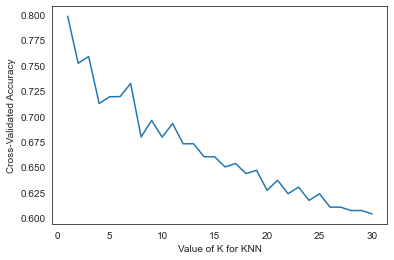

In [99]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [100]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
print(cross_val_score(logreg, X_dtm, y, cv=10, scoring='accuracy').mean())

0.7984946236559141


In [102]:
# More efficient parameter tuning using GridSearchCV

from sklearn.model_selection import GridSearchCV

In [103]:
# define the parameter values that should be searched
k_range = list(range(1, 31))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [104]:

# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [105]:
# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

In [106]:
# fit the grid with data
grid.fit(X_dtm, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=30),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

In [108]:

# view the complete results (list of named tuples)
grid.cv_results_

{'mean_fit_time': array([0.00207942, 0.00139639, 0.00079207, 0.00079882, 0.00099494,
        0.00069866, 0.00069695, 0.00049884, 0.00079658, 0.00069847,
        0.00099096, 0.00089903, 0.00059841, 0.00079665, 0.00100114,
        0.00059853, 0.00099666, 0.00079789, 0.00099423, 0.00099792,
        0.00099909, 0.00100241, 0.00099669, 0.00100269, 0.00089672,
        0.00109327, 0.00100803, 0.00098987, 0.0009937 , 0.00089245]),
 'std_fit_time': array([1.11183787e-03, 4.80393457e-04, 3.97318761e-04, 3.99440261e-04,
        5.39527074e-06, 4.57383848e-04, 4.56263433e-04, 4.98844522e-04,
        3.98293653e-04, 4.57267022e-04, 1.21069696e-05, 2.99697101e-04,
        4.88599792e-04, 3.98342384e-04, 1.17989257e-05, 4.88698946e-04,
        1.94585203e-06, 3.98953969e-04, 1.13975303e-05, 4.06599803e-06,
        5.37077210e-06, 1.20089145e-05, 2.32185914e-06, 1.10216451e-05,
        2.99307867e-04, 3.00991615e-04, 1.54468746e-05, 2.43149081e-05,
        2.04043545e-05, 2.98767321e-04]),
 'mean_scor

In [110]:
# examine the first tuple
print(grid.cv_results_[0].parameters)
print(grid.cv_results_[0].cv_validation_scores)
print(grid.cv_results_[0].mean_validation_score)

KeyError: 0

In [77]:
# create a list of the mean scores only
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print(grid_mean_scores)

[0.7491749174917491, 0.6996699669966997, 0.7260726072607261, 0.7326732673267327, 0.7524752475247525, 0.6831683168316832, 0.7161716171617162, 0.66996699669967, 0.6798679867986799, 0.6732673267326733, 0.6798679867986799, 0.6567656765676567, 0.6600660066006601, 0.6567656765676567, 0.6600660066006601, 0.6402640264026402, 0.6534653465346535, 0.6270627062706271, 0.636963696369637, 0.6336633663366337, 0.636963696369637, 0.6237623762376238, 0.6303630363036303, 0.6204620462046204, 0.6237623762376238, 0.6204620462046204, 0.6270627062706271, 0.6072607260726073, 0.6105610561056105, 0.6072607260726073]


In [111]:
# plot the results
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

NameError: name 'grid_mean_scores' is not defined

In [79]:
# convert label to a numerical variable
df_without_preprocess['Sentiment_num'] = df_without_preprocess.Sentiment.map({'Negative':0, 'Positive':1})

In [80]:
# how to define X and y (from the Suicide data) for use with COUNTVECTORIZER
X = df_without_preprocess.Content
y = df_without_preprocess.Sentiment_num
print(X.shape)
print(y.shape)

(303,)
(303,)


In [81]:
# split X and y into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(227,)
(76,)
(227,)
(76,)


In [82]:
# import and instantiate CountVectorizer (with the default parameters)
from sklearn.feature_extraction.text import CountVectorizer

In [83]:
# instantiate the vectorizer
vect = CountVectorizer()

In [84]:
# learn training data vocabulary, then use it to create a document-term matrix
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)

In [85]:
# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)

In [86]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [87]:
# train the model using X_train_dtm (timing it with an IPython "magic command")
%time nb.fit(X_train_dtm, y_train)

Wall time: 13 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [88]:
# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)

In [89]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.93421052631578949

In [90]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[37,  3],
       [ 2, 34]])

In [91]:
# import and instantiate a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [92]:
# train the model using X_train_dtm
%time logreg.fit(X_train_dtm, y_train)

Wall time: 12 ms


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [93]:
# make class predictions for X_test_dtm
y_pred_class = logreg.predict(X_test_dtm)

In [94]:
# calculate accuracy
metrics.accuracy_score(y_test, y_pred_class)

0.86842105263157898

In [95]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_dtm, y_train)
y_pred = knn.predict(X_test_dtm)
print(metrics.accuracy_score(y_test, y_pred))

0.605263157895


In [96]:
vect.fit(X)
X_dtm = vect.transform(X)

In [97]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X_dtm, y, cv=10, scoring='accuracy')
print(scores)

[ 0.67741935  0.70967742  0.61290323  0.61290323  0.58064516  0.7
  0.63333333  0.86666667  0.5862069   0.72413793]


In [98]:
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

0.670389321468


### Accuracy %
### classifier                      before        after
#### knn                            67 %            76 %         
#### logistic regression            86 %            88 %
#### Naive Bayes                    93 %            96 %